# Movie Recommendation System

In [1]:
# import libraries
import pandas as pd
import numpy as np

/Users/yifeishi/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


The main objective of this project is to create **a movie recommendation system** based on the TMDb dataset(The Movie Database), which is a comprehensive movie database that provides information about movies, including details like titles, ratings, release dates, revenue, genres, and much more.
<br><br>The original dataset can be found here https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data
<br>It contains real-time movie information and updated to include movies in 2024.

## Model Development

This recommendation system suggests similar movies based on the ***similarity*** between each movie, based on genres, keywords, ratings, language etc.

### Data Exploration

In [2]:
# load dataset
df = pd.read_csv('TMDB_movie_dataset_v11.csv')

In [3]:
# display all columns & the head rows of the dataset
pd.set_option('display.max_columns', None)
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165195 entries, 0 to 1165194
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1165195 non-null  int64  
 1   title                 1165182 non-null  object 
 2   vote_average          1165195 non-null  float64
 3   vote_count            1165195 non-null  int64  
 4   status                1165195 non-null  object 
 5   release_date          965873 non-null   object 
 6   revenue               1165195 non-null  int64  
 7   runtime               1165195 non-null  int64  
 8   adult                 1165195 non-null  bool   
 9   backdrop_path         307061 non-null   object 
 10  budget                1165195 non-null  int64  
 11  homepage              122790 non-null   object 
 12  imdb_id               609475 non-null   object 
 13  original_language     1165195 non-null  object 
 14  original_title        1165182 non-

There are over 1 million records of movies in our dataset, 23 attributes are documented, including title, vote counts, revenue, etc.
<br>Most columns are in object format(conversion needed), and **key features** include:
1. **movie itself**: id, title, genres, runtime, adult, original language, keywords, release year...
2. **rating & popularity**: vote counts, popularity...
3. **profitability**: revenue, budget, production companies & countries...

Since the stakeholder of our recommendatoion system is audiences instead of investors, thus our model is not concerned about the profitability, so **columns such as revenue, budgets, should be removed during data preprocessing stage**.

In [5]:
# check for any missing values
df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             199322
revenue                       0
runtime                       0
adult                         0
backdrop_path            858134
budget                        0
homepage                1042405
imdb_id                  555720
original_language             0
original_title               13
overview                 240476
popularity                    0
poster_path              373304
tagline                 1001931
genres                   472211
production_companies     642081
production_countries     521874
spoken_languages         502111
keywords                 852889
dtype: int64

Notied there are significant amount of missing values in columns such as backdrop paths, homepage, poster_path...Since these information are irrelevant to our model building, it is safe to ignore. 
<br>
<br>However, **release_date** (17% missing) and **genres** (40% missing) are essential to our model development, so **new method should be implemented to solve this issue during data preprocessing stage**.

In [6]:
# check for any duplicates
df.duplicated().sum()

370

In [7]:
# relatively small numbers of duplicates, just drop them
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Content-based Filtering

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.<br><br>
In this case, I will focus on the **intrinsic attributes** of movies in our dataset, which include title, release date, runtime, adult, original language and genres. I will **extract relevant information**, **binary-encode each feature** and **vectorize each data entry**, so that I can **calculate the cosine similarity** between each movie for recommendation.


### Feature Selection

In [8]:
df['title'].isnull().sum()

13

In [9]:
df = df[~df['title'].isnull()]

In [10]:
df['title'].isnull().sum()

0

In [ ]:
df['title'] = df['title'].str.strip().str.lower().str.replace(' ', '')

In [11]:
# convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].dt.year.value_counts().sort_index()

release_date
1800.0    2
1837.0    1
1865.0    3
1867.0    1
1874.0    1
         ..
2057.0    1
2061.0    1
2069.0    1
2074.0    1
2099.0    1
Name: count, Length: 165, dtype: int64

Noticed some years are wayyyy off the normal timeline, since the first movie ever released is in 1895, and the latest movie in this databse should be releaed in 2024.

In [12]:
# view the rows with release years before 1900
df[df['release_date'].dt.year < 1900].sort_values('release_date')

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
702525,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,0.000,0,Released,1800-01-01,100000000,0,False,NaN,0,NaN,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.600,/bCKTrWbglTHpTgl3crAhHZg7TgK.jpg,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN
644545,1233885,A Farsa de Inês Pereira,0.000,0,Released,1800-09-11,0,56,False,NaN,0,NaN,NaN,pt,A Farsa de Inês Pereira,The farsades of ines pereira by the goat of my...,0.600,NaN,NaN,NaN,NaN,NaN,Portuguese,NaN
566682,1314804,Kaskisavun mailta,0.000,0,Released,1837-10-29,0,14,False,NaN,0,NaN,NaN,en,Kaskisavun mailta,Finnish short documentary,0.651,NaN,NaN,NaN,NaN,Finland,Finnish,NaN
727454,1244969,Felix Nadar Spinning in his Chair,0.000,0,Released,1865-01-01,0,1,False,NaN,0,NaN,tt31150469,fr,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.600,NaN,NaN,Documentary,Paris Nadar Studio,NaN,No Language,NaN
346739,1181748,Felix Nadar Spinning in his Chair,10.000,1,Released,1865-01-01,0,1,False,NaN,0,NaN,NaN,en,Felix Nadar Spinning in his Chair,Revolving portrait of French photographer Feli...,1.162,/zjqn8AjirFf3434cKVAm6SV9fLH.jpg,NaN,Documentary,NaN,France,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235332,1307436,Lord Roberts Leaving For South Africa,5.000,1,Released,1899-12-23,0,1,False,NaN,0,https://player.bfi.org.uk/free/film/watch-lord...,NaN,en,Lord Roberts Leaving For South Africa,An actuality and reportage film. This film cap...,0.931,/fv3CKIq7ZD6j0fxUwmpR998DbLs.jpg,NaN,"Documentary, War",Warwick Trading Company,NaN,NaN,"british army, 19th century, boer war, 1890s, a..."
1099939,665847,Les mines de charbon de Hon Gay,0.000,0,Released,1899-12-28,0,1,False,NaN,0,NaN,tt11657292,fr,Les mines de charbon de Hon Gay,Local workers climb the slope pushing carts.,0.600,/cqdfPQdp8MKoSIlrQ7Q0BYDzuJQ.jpg,NaN,Documentary,Lumière,France,No Language,NaN
73558,262854,La Pelouse - Voitures et foules,5.500,11,Released,1899-12-31,0,1,False,NaN,0,NaN,tt3177210,en,La Pelouse - Voitures et foules,Carriages and crowds cross a grassy area.,0.600,/qVYEBzH8w7jP8DoMXryB2uo4b1q.jpg,NaN,NaN,Lumière,NaN,NaN,NaN
72699,268410,Le vieux Paris: Vue prise en bateau,5.600,11,Released,1899-12-31,0,1,False,NaN,0,NaN,tt3177214,en,Le vieux Paris: Vue prise en bateau,"Paris seen from a boat, in this Lumière short ...",0.600,/phY7NfgRE5oc7Wza9rnglAuMES7.jpg,NaN,NaN,Lumière,NaN,NaN,NaN


In [13]:
# view the rows with release years after 2024
df[df['release_date'].dt.year > 2024].sort_values('release_date', ascending=False)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
908375,401563,100 Years,0.0,0,Post Production,2099-11-18,0,0,False,/4TyGzPj6OpMXxoy68L0QauOiHVd.jpg,0,http://www.louisxiii-cognac.com/#100-years,tt5174640,en,100 Years,"100 Years is an ""upcoming"" science fiction fil...",2.238,/xx6Vps04pGpJ7dZ7UfUy4HpXgPI.jpg,The movie you will never see.,"Drama, Science Fiction","Troublemaker Studios, Kouz Production, Moonwal...",France,English,NaN
741268,1259555,La Grève des ouvriers de Margoline,0.0,0,In Production,2074-01-01,0,0,False,NaN,0,NaN,NaN,fr,La Grève des ouvriers de Margoline,NaN,0.600,/h3JH0OtnDjjkIvzjY6IGV7mZazu.jpg,NaN,Documentary,Collectif Cinélutte,France,"Arabic, French","short film, documentary film, manifestation"
588505,1414861,Fast X Part 2 2 Fast X Too Furious Too Serious...,0.0,0,Planned,2069-09-11,0,169,False,/rq9NYaWJpt92H9fzsCWOONXqKRE.jpg,369000000,https://www.thefastsaga.com,NaN,en,Fast X Part 2 2 Fast X Too Furious Too Serious...,Dom Toretto and his crew face off against a ne...,1.400,/bHaDFHOu36YprjjeRz8kgce5Gnr.jpg,Double Trouble,"Action, Crime, Thriller","Universal Pictures, Original Film, One Race, P...",NaN,English,"sequel, racing, family, cars"
702708,1291666,Pikkuinen...,0.0,0,Released,2061-12-07,0,0,False,NaN,0,NaN,NaN,fi,Pikkuinen...,NaN,0.000,NaN,NaN,Documentary,NaN,NaN,NaN,NaN
547223,1310788,Athens dances Rock 'n' Roll,0.0,0,Released,2057-01-01,0,20,False,NaN,0,NaN,NaN,el,Η Αθήνα χορεύει Rock 'n' Roll,The film refers to the fashion of the new Amer...,0.000,/fCS2L46pbdfV7F3MFCfugD6WCpf.jpg,NaN,Documentary,NaN,Greece,Greek,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580406,1391250,Les Lettres de l’Angoisse 2,0.0,0,In Production,2025-01-01,0,0,False,NaN,0,NaN,NaN,fr,Les Lettres de l’Angoisse 2,NaN,1.400,/m5q3CqsgzOn1oo9zOAuqwrOLWEE.jpg,NaN,"Horror, Thriller",NaN,France,NaN,NaN
577620,1403514,Harvest Moon,0.0,0,Released,2025-01-01,0,12,False,NaN,0,https://instragam.com/nasaindy_cortometraje,NaN,es,Ñasaindy,Jasy (15) and Yeruti (21) are two guarani were...,1.400,/vy3Z1UzOiwXgXBCBUPET85VPlXZ.jpg,Ñasaindy is the legacy that lies within me.,Fantasy,Self Produced,Argentina,"Guarani, Spanish","guaraní, argentinian, werewolves, argentinian ..."
646338,1231912,Unholy,0.0,0,In Production,2025-01-01,0,30,False,NaN,0,NaN,NaN,en,Unholy,When a Young boy's body is found dead in a rur...,0.000,/fnRtv6j2bZvbe0lBB1qae6ejRwr.jpg,What hides in the basement?,Horror,TKSC Productions,NaN,NaN,NaN
646605,1236950,Das Ende der Vernunft,0.0,0,In Production,2025-01-01,0,0,False,/ejsqAtzzusKtOQtaTVtAAn0F2DN.jpg,7000,NaN,NaN,de,Das Ende der Vernunft,NaN,0.600,/aWKdKQCE7AtXWrVMEsGaB1DrO7w.jpg,NaN,"Drama, Comedy",WAM - Medienakademie,Germany,German,"gier, macht"


In [14]:
df[df['release_date'].dt.year > 2024]['status'].value_counts()

status
In Production      775
Released           765
Planned            243
Post Production    231
Rumored              8
Canceled             1
Name: count, dtype: int64

Noticed movie records with a release year before 1900 are mostly scripts or plays (ex.A Farsa de Inês Pereira), which do not fall into the category under 'movie', thus they should be trimmed off.
<br><br>Also noticed movies with a release year after 2024 do not include any movie with a status of 'released', thus should be trimmed off as well, along with any movie that is not under the status of **'released'**

In [15]:
# drop any rows with release year smaller than 1900
df = df[df['release_date'].dt.year >= 1900]
# drop any rows with release year larger than 2024
df = df[df['release_date'].dt.year <= 2024]
# validate
df['release_date'].dt.year.value_counts().sort_index()

release_date
1900      408
1901      283
1902      237
1903      348
1904      284
        ...  
2020    40738
2021    43984
2022    45181
2023    45094
2024    30615
Name: count, Length: 125, dtype: int64

In [16]:
# check any status under the 'status' column
df['status'].value_counts()

status
Released           953129
In Production        5449
Post Production      2413
Planned               617
Canceled               12
Rumored                 9
Name: count, dtype: int64

any movie that is not under 'released' status is not available to watch, thus should be trimmed off

In [17]:
df = df[df['status'] == 'Released']
df['status'].value_counts()

status
Released    953129
Name: count, dtype: int64

Up unil now we still have 953k validate movie data in our databse, it is still a great resort.

In [18]:
# check runtime of each movie in the dataset
df['runtime'].describe()

count    953129.000000
mean         53.325840
std          62.950127
min           0.000000
25%           3.000000
50%          44.000000
75%          90.000000
max       14400.000000
Name: runtime, dtype: float64

The minumum runtime is 0 and maxium is 14400, something is off.

In [19]:
df['runtime'].value_counts().sort_index()

runtime
0        208228
1          7546
2          9361
3         13979
4         12605
          ...  
7200          1
9000          1
12480         1
13319         1
14400         1
Name: count, Length: 728, dtype: int64

In [20]:
df[df['runtime'] == 0].shape[0]

208228

Noticed there are **208230 records** with 0 runtime, they must be removed.

In [21]:
df[df['runtime'] <= 15].shape[0]

380993

In [22]:
df[df['runtime'] <= 15].head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
2459,326359,Frozen Fever,6.831,1737,Released,2015-03-09,0,8,False,/ic16B2KUfEFicIB3eiBUAYqrwz7.jpg,0,NaN,tt4007502,en,Frozen Fever,"On Anna's birthday, Elsa and Kristoff are dete...",20.049,/mPrDJ7puYzPLG5kPM96iNszF2sM.jpg,NaN,"Animation, Family, Adventure, Comedy",Walt Disney Animation Studios,United States of America,English,"princess, sibling relationship, birthday, cart..."
2617,140420,Paperman,7.999,1620,Released,2012-11-02,0,7,False,/48v92pR5a1JeczlrCwnr1eQBN2j.jpg,0,http://www.disneyanimation.com/projects/shorts...,tt2388725,en,Paperman,An urban office worker finds that paper airpla...,15.954,/6MXYNvGmI63W8fI3HKlcZzEy1U5.jpg,"Delicate, charming and sweet.","Animation, Family, Romance","Walt Disney Pictures, Walt Disney Animation St...",United States of America,English,"skyscraper, black and white, paper airplane, o..."
2668,775,A Trip to the Moon,7.900,1580,Released,1902-04-17,0,15,False,/jeC1kzwWnZTuXl7xF4E5D70BD8c.jpg,5985,NaN,tt0000417,fr,Le Voyage dans la Lune,Professor Barbenfouillis and five of his colle...,17.886,/9o0v5LLFk51nyTBHZSre6OB37n2.jpg,NaN,"Adventure, Science Fiction",Star-Film,France,No Language,"moon, based on novel or book, satire, astronom..."
2776,399106,Piper,8.164,1518,Released,2016-06-16,0,6,False,/4GWYk5VP9qu1rNSeNAwNaBy9mwS.jpg,0,http://www.pixar.com/short_films/Theatrical-Sh...,tt5613056,en,Piper,A mother bird tries to teach her little one ho...,9.611,/rfEkkVzmrMYqGezNLl02mVyJCP2.jpg,NaN,"Family, Animation","Pixar, Walt Disney Pictures",United States of America,English,"fear, short film"
3647,13930,For the Birds,7.477,1106,Released,2000-11-02,0,3,False,/4x0YosZ3AKIMElxvZZ4hCMBIVkF.jpg,0,https://www.pixar.com/for-the-birds,tt0248808,en,For the Birds,"One by one, a flock of small birds perches on ...",13.534,/50j57HZij4mR1wZCNAAdXzTyeCq.jpg,NaN,"Animation, Family, Comedy",Pixar,United States of America,No Language,"clique, short film"


Some movies under 15 minutes are shorts (ex.frozen fever), they still fall under the definition of movie, but **they should be categorized as short during data preprocessing stage**.

In [23]:
df[df['runtime']>= 360].shape[0]

1595

In [24]:
df[df['runtime']>= 360].sort_values('runtime', ascending=False).head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
184732,251800,Modern Times Forever,7.0,2,Released,2011-03-23,0,14400,False,NaN,0,NaN,tt2659636,en,"Stora Enso Building, Helsinki","The film shows centuries of decay, compressed ...",0.896,/wLO187Bh5udP3nYINc7D314sS5X.jpg,NaN,Documentary,NaN,"Denmark, Finland, Vietnam",Danish,NaN
1075944,710874,Svalbard minutt for minutt,0.0,0,Released,2020-01-31,0,13319,False,/ejSYxDnjPUIElj2V0SCsvrE7B2J.jpg,0,NaN,tt11707418,en,Svalbard minutt for minutt,A documentary trying to relive the 10 days of ...,0.600,/vi6ADwjwvvrVjAa08b9PxWvgbyV.jpg,NaN,Documentary,NaN,NaN,Norwegian,real time
107277,272074,Cinématon,4.3,6,Released,1978-12-20,0,12480,False,/6fJgLOFJO5AAlieLZxfmTyZKOEy.jpg,0,http://www.gerardcourant.com/index.php?t=cinem...,tt0242365,fr,Cinématon,Cinématon is a 156-hour long experimental film...,1.968,NaN,NaN,Documentary,"K.O.C.K. Production, Les Amis de Cinématon",France,No Language,NaN
325954,197299,Beijing 2003,1.0,1,Released,2004-01-01,0,9000,False,NaN,0,NaN,tt2355497,en,Beijing 2003,Beijing 2003 is a video about the city that th...,0.707,NaN,NaN,Documentary,Ai Weiwei Studio,China,Mandarin,NaN
1076518,717019,Untitled #125 (Hickory),0.0,0,Released,2011-01-01,0,7200,False,NaN,0,NaN,NaN,en,Untitled #125 (Hickory),In 2011 Azzarella released Untitled #125 (Hick...,0.600,/krgZwsqAJbXcKmjdio1oBeaYQb7.jpg,NaN,NaN,NaN,NaN,NaN,NaN


Noticed there are **1595 records** with runtime greater than 360 minutes (any movie longer than 6 hours is not watchable, in my humble opinion), thus these records need to be trimmed off.

In [25]:
df=df[(df['runtime'] != 0) & (df['runtime'] <= 360)]
df['runtime'].describe()

count    743464.000000
mean         67.182267
std          49.660375
min           1.000000
25%          17.000000
50%          74.000000
75%          96.000000
max         360.000000
Name: runtime, dtype: float64

In [26]:
df[df['runtime'] <= 5].sort_values('runtime').head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
1067300,678822,Cooking,0.0,0,Released,2019-08-19,0,1,False,NaN,0,NaN,NaN,en,Cooking,An egg gets boiled,0.6,/6DI3ycxvl3bhvwu1nDzV7YIOX1o.jpg,And that's how breakfast is made,Animation,Adult Swim,NaN,NaN,"breakfast, surreal"
557036,1323589,"¡Aaah, Zombies!",0.0,0,Released,2021-09-12,0,1,False,/s4glpFuFsoDnxgI5YSyhta9RJzP.jpg,50,https://youtube.com/shorts/ld37Qyljjdc?feature...,NaN,es,"¡Aaah, Zombies!",Two kids from argentina have to fight zombies ...,1.4,/8hIwsxCOKbTTGaPFBRYHa322cYO.jpg,They'll Make You Scream...,"Action, Adventure","Movies, Games And More",Argentina,Spanish,NaN
557090,1324859,Lazy Dog,0.0,0,Released,2012-01-01,0,1,False,NaN,0,NaN,NaN,en,Lazy Dog,A Cartoon about a sleeping dog.,0.6,/oAVj6kVUHemCJIX3oFZ2ypxVu5k.jpg,NaN,Animation,Bruno Bozzetto Distribution,Italy,No Language,NaN
890322,232693,Ellehammers første Forsøg med Aeroplan,0.0,0,Released,1908-11-03,0,1,False,NaN,0,NaN,NaN,da,Ellehammers første Forsøg med Aeroplan,Inventor Jacob Ellehammer's first attempts at ...,0.6,NaN,NaN,Documentary,Nordisk Film Denmark,Denmark,No Language,silent film
709720,1286641,Instinto,0.0,0,Released,2024-05-11,0,1,False,NaN,0,NaN,NaN,es,Instinto,The vision of a girl will reveal a terrible ev...,1.4,/8ts2J8gHdY4aOeGujYMlIzt1Q1q.jpg,NaN,NaN,NaN,NaN,Spanish,NaN


Noticed some movies have zero revenue, even though this attribute is not relevant to our model building, this can be used to validate our data.

In [27]:
df[df['revenue'] == 0].head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
325,405774,Bird Box,6.854,9227,Released,2018-12-13,0,124,False,/pDKFL1zcHzEpmz4MJA5JJnRbJeD.jpg,19800000,https://www.netflix.com/title/80196789,tt2737304,en,Bird Box,Five years after an ominous unseen presence dr...,27.913,/rGfGfgL2pEPCfhIvqHXieXFn7gp.jpg,Never lose sight of survival,"Horror, Thriller, Drama","Bluegrass Films, Chris Morgan Productions",United States of America,English,"based on novel or book, post-apocalyptic futur..."
328,791373,Zack Snyder's Justice League,8.190,9202,Released,2021-03-18,0,242,False,/4LO6bnNGIa8zNbM6HwCYzlUKIHq.jpg,70000000,https://www.hbomax.com/zacksnydersjusticeleague,tt12361974,en,Zack Snyder's Justice League,Determined to ensure Superman's ultimate sacri...,130.690,/tnAuB8q5vv7Ax9UAEje5Xi4BXik.jpg,Us united.,"Action, Adventure, Fantasy","Warner Bros. Pictures, The Stone Quarry, Atlas...",United States of America,English,"saving the world, superhero, resurrection, bas..."
395,466282,To All the Boys I've Loved Before,7.642,8045,Released,2018-08-16,0,100,False,/xXhta1NIKn09IXy0mfp68cabdWS.jpg,0,https://www.netflix.com/title/80203147,tt3846674,en,To All the Boys I've Loved Before,Lara Jean's love life goes from imaginary to o...,38.926,/hKHZhUbIyUAjcSrqJThFGYIR6kI.jpg,The letters are out.,"Comedy, Romance","Awesomeness Films, Overbrook Entertainment",United States of America,English,"high school, based on novel or book, love lett..."
509,454983,The Kissing Booth,7.229,6926,Released,2018-05-11,0,105,False,/aqrDUkuzksLhOD8pbyBXLO0dz5t.jpg,0,https://www.netflix.com/title/80143556,tt3799232,en,The Kissing Booth,When teenager Elle's first kiss leads to a for...,36.649,/7Dktk2ST6aL8h9Oe5rpk903VLhx.jpg,"She can tell her best friend anything, except ...","Romance, Comedy",Komixx Entertainment,United Kingdom,English,"based on novel or book, crush, los angeles, ca..."
670,766507,Prey,7.762,5821,Released,2022-08-02,0,100,False,/7ZO9yoEU2fAHKhmJWfAc2QIPWJg.jpg,65000000,https://www.20thcenturystudios.com/movies/prey,tt11866324,en,Prey,"When danger threatens her camp, the fierce and...",154.579,/ujr5pztc1oitbe7ViMUOilFaJ7s.jpg,They hunt to live. It lives to hunt.,"Thriller, Action, Science Fiction",20th Century Studios,United States of America,"English, French","hunter, native american, alien life-form, alie..."


Noticed many blockbuster hits(bird box, Zack Snyder's Justice League) are listed here, so there could be many errors in recording revenue, so we should proceed without trimming.

In [28]:
df['genres'].head()

0             Action, Science Fiction, Adventure
1              Adventure, Drama, Science Fiction
2                 Drama, Action, Crime, Thriller
3    Action, Adventure, Fantasy, Science Fiction
4             Science Fiction, Action, Adventure
Name: genres, dtype: object

In [29]:
df['tagline'].head()

0                 Your mind is the scene of the crime.
1    Mankind was born on Earth. It was never meant ...
2                    Welcome to a world without rules.
3                          Enter the world of Pandora.
4                              Some assembly required.
Name: tagline, dtype: object

In [30]:
df['overview'].head()

0    Cobb, a skilled thief who commits corporate es...
1    The adventures of a group of explorers who mak...
2    Batman raises the stakes in his war on crime. ...
3    In the 22nd century, a paraplegic Marine is di...
4    When an unexpected enemy emerges and threatens...
Name: overview, dtype: object

In [31]:
df['keywords'].head()

0    rescue, mission, dream, airplane, paris, franc...
1    rescue, future, spacecraft, race against time,...
2    joker, sadism, chaos, secret identity, crime f...
3    future, society, culture clash, space travel, ...
4    new york city, superhero, shield, based on com...
Name: keywords, dtype: object

Noticed overview and tagline are equivalent to each other, and their main theme can be summarized by column 'genre', thus **these two columns can be dropped during data preprocessing stage.**
<br><br>Noticed many movies have comprehensive genres and keywords, and different combination can confuse the similarity between each pair, **more data processing is needed**.

What about production companies and languages? Are they comprehensive as well?

In [32]:
df['production_countries'].value_counts()

production_countries
United States of America                           159644
Japan                                               35760
United Kingdom                                      30082
France                                              21495
Germany                                             16766
                                                    ...  
Netherlands, Japan                                      1
Iran, Mexico, United States of America                  1
Australia, Lithuania                                    1
United Kingdom, United States of America, Kenya         1
Bulgaria, Georgia, Germany, Ukraine                     1
Name: count, Length: 9360, dtype: int64

In [33]:
df['original_language'].value_counts().head(10)

original_language
en    438649
ja     40726
fr     35412
es     32617
de     23317
ru     15729
pt     13842
it     13434
zh     13330
ko      8962
Name: count, dtype: int64

In [34]:
df.shape[0]

743464

Noticed all records only have **one** original language, which can be used in model development, and majority(79%) of the movies in this dataset are in English, Japanese, French, Spanish, German, and Russia, and **these languages can be major categories during data preprocessing stage.**

In [35]:
df['spoken_languages'].value_counts()

spoken_languages
English                                       206171
Japanese                                       35014
Spanish                                        26454
French                                         23980
No Language                                    22857
                                               ...  
Albanian, German, French, Italian                  1
German, English, French, Japanese, Spanish         1
English, Marshall, Russian                         1
Mandarin, Sanskrit                                 1
English, Latvian, Russian, German                  1
Name: count, Length: 6526, dtype: int64

Noticed there are incidents with movies have multiple spoken languages, which can means this movie is available in multiple languages.<BR><BR>
However, no guarantee if the audiences will also see similarity between two movies in two different cultures but only available in the same translation , thus **this column will be removed during data preprocessing stage**.

In [36]:
df['vote_average'].describe()

count    743464.000000
mean          2.437325
std           3.196481
min           0.000000
25%           0.000000
50%           0.000000
75%           5.615000
max          10.000000
Name: vote_average, dtype: float64

In [37]:
df['vote_count'].describe()

count    743464.000000
mean         28.677668
std         393.467485
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       34495.000000
Name: vote_count, dtype: float64

In [38]:
df['popularity'].describe()

count    743464.000000
mean          1.574750
std           9.310857
min           0.000000
25%           0.600000
50%           0.600000
75%           1.151000
max        2994.357000
Name: popularity, dtype: float64

Based on the stats summary of rating average and rating counts, there is very few information regarding popularity of each movie, as the 75% percentile of vote_counts is only 2, and median of the rating is 0-- **these columns will also be removed during data preprocessing stage**.

In [39]:
df['popularity'].sort_values(ascending=False).head(10)

3868     2994.357
5049     2680.593
50521    2020.286
7930     1692.778
2129     1567.273
9970     1547.220
4017     1458.514
1110     1175.267
6394     1111.036
825      1069.340
Name: popularity, dtype: float64

In [40]:
import matplotlib.pyplot as plt

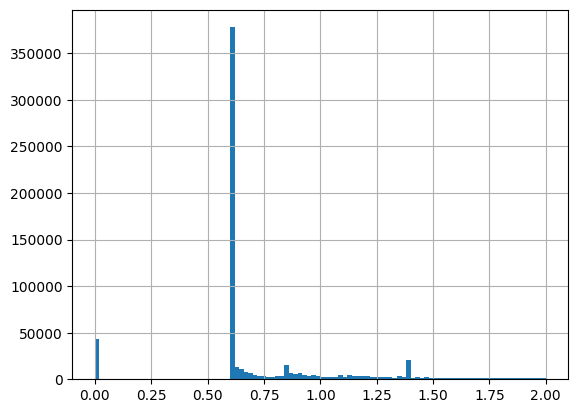

In [41]:
df['popularity'].hist(bins=100, range=(0,2))
plt.show()

Based on the distribution of populrity score, we can see there is a extreme skewness in lower socres, particularly between 0.5-0.75, whereas the max score can amount to almost 3000. The logic behind this popularity score is still unclear, and this scale of imbalance can largely affect the similarity result, as a result, **popularity should be removed.**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743464 entries, 0 to 1165194
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    743464 non-null  int64         
 1   title                 743464 non-null  object        
 2   vote_average          743464 non-null  float64       
 3   vote_count            743464 non-null  int64         
 4   status                743464 non-null  object        
 5   release_date          743464 non-null  datetime64[ns]
 6   revenue               743464 non-null  int64         
 7   runtime               743464 non-null  int64         
 8   adult                 743464 non-null  bool          
 9   backdrop_path         249216 non-null  object        
 10  budget                743464 non-null  int64         
 11  homepage              99698 non-null   object        
 12  imdb_id               467616 non-null  object        
 13  ori

***Conclusion: columns kept for model building are as followed: title(as index), release_date, runtime, adult, original_language, genres, keywords***

In [43]:
df_for_model = df[['title', 'release_date', 'runtime', 'adult', 'original_language', 'genres', 'keywords']]
df_for_model.head()

,title,release_date,runtime,adult,original_language,genres,keywords
0,Inception,2010-07-15,148,False,en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc..."
1,Interstellar,2014-11-05,169,False,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,..."
2,The Dark Knight,2008-07-16,152,False,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f..."
3,Avatar,2009-12-15,162,False,en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ..."
4,The Avengers,2012-04-25,143,False,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com..."


### Feature Engineering

1. For attributes with uni-value cell, I will encode categorical features using multilabel binarizer; 
2. For multiple values in the same column(ex.genres), I will parse each value and convert them into usable lists of genres, and created binary vectors representing the presence or absence of each genre for each movie.
<br><br>***The transformed table will vectorize each movie with binary encoding.***

In [44]:
# check for any missing values
df_for_model.isnull().sum()

title                     0
release_date              0
runtime                   0
adult                     0
original_language         0
genres               220864
keywords             487146
dtype: int64

In [45]:
df_for_model['genres'].fillna('unknown', inplace=True)
df_for_model['genres'].isnull().sum()

/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_9545/1817106949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_model['genres'].fillna('unknown', inplace=True)
/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_9545/1817106949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['genres'].fillna('unkno

0

In [46]:
df_for_model['keywords'].fillna('unknown', inplace=True)
df_for_model['keywords'].isnull().sum()

/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_9545/1131470664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_model['keywords'].fillna('unknown', inplace=True)
/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_9545/1131470664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['keywords'].fillna('u

0

In [47]:
# extract year from release_date, and refactor it into different time periods based on empirical knowledge
def define_era(row):
    if row['release_date'].year < 1927:
        return 'The Silent Era'
    elif row['release_date'].year < 1960:
        return 'Golden Age'
    elif row['release_date'].year < 1980:
        return 'Post-War Era'
    elif row['release_date'].year < 1990:
        return 'Blockbuster Era'
    else:
        return 'Digital Era'


In [48]:
df_for_model['era'] = df_for_model.apply(define_era, axis=1)
df_for_model.head()

/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_9545/2262823420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['era'] = df_for_model.apply(define_era, axis=1)


,title,release_date,runtime,adult,original_language,genres,keywords,era
0,Inception,2010-07-15,148,False,en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Digital Era
1,Interstellar,2014-11-05,169,False,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Digital Era
2,The Dark Knight,2008-07-16,152,False,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Digital Era
3,Avatar,2009-12-15,162,False,en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Digital Era
4,The Avengers,2012-04-25,143,False,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Digital Era


In [49]:
df_for_model['era'].value_counts()

era
Digital Era        559499
Post-War Era        67425
Golden Age          52248
Blockbuster Era     48063
The Silent Era      16229
Name: count, dtype: int64

In [50]:
# refector runtime into different types of movies based on empirical knowledge
def define_runtime(row):
    if row['runtime'] < 40:
        return 'Short Film'
    elif row['runtime'] < 60:
        return 'Featurette'
    elif row['runtime'] < 120:
        return 'Feature Film'
    elif row['runtime'] < 180:
        return 'Extended Feature Film'
    else:
        return 'Epic Length Film'

In [51]:
df_for_model['runtime_type'] = df_for_model.apply(define_runtime, axis=1)
df_for_model.head()

/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_9545/170484515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['runtime_type'] = df_for_model.apply(define_runtime, axis=1)


,title,release_date,runtime,adult,original_language,genres,keywords,era,runtime_type
0,Inception,2010-07-15,148,False,en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Digital Era,Extended Feature Film
1,Interstellar,2014-11-05,169,False,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Digital Era,Extended Feature Film
2,The Dark Knight,2008-07-16,152,False,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Digital Era,Extended Feature Film
3,Avatar,2009-12-15,162,False,en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Digital Era,Extended Feature Film
4,The Avengers,2012-04-25,143,False,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Digital Era,Extended Feature Film


In [52]:
df_for_model['runtime_type'].value_counts()

runtime_type
Feature Film             340899
Short Film               259410
Extended Feature Film     69407
Featurette                57183
Epic Length Film          16565
Name: count, dtype: int64

In [53]:
# refector languages into six major langueges and others
def define_language(row):
    if row['original_language']=='en':
        return 'English'
    elif row['original_language']=='ja':
        return 'Japanese'
    elif row['original_language']=='fr':
        return 'French'
    elif row['original_language']=='es':
        return 'Spanish'
    elif row['original_language']=='de':
        return 'German'
    elif row['original_language']=='ru':
        return 'Russian'
    else:
        return 'Other'

In [54]:
df_for_model['language'] = df_for_model.apply(define_language, axis=1)
df_for_model.head()

/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_9545/335948949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['language'] = df_for_model.apply(define_language, axis=1)


,title,release_date,runtime,adult,original_language,genres,keywords,era,runtime_type,language
0,Inception,2010-07-15,148,False,en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",Digital Era,Extended Feature Film,English
1,Interstellar,2014-11-05,169,False,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",Digital Era,Extended Feature Film,English
2,The Dark Knight,2008-07-16,152,False,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",Digital Era,Extended Feature Film,English
3,Avatar,2009-12-15,162,False,en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",Digital Era,Extended Feature Film,English
4,The Avengers,2012-04-25,143,False,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",Digital Era,Extended Feature Film,English


In [55]:
df_for_model['language'].value_counts()

language
English     438649
Other       157014
Japanese     40726
French       35412
Spanish      32617
German       23317
Russian      15729
Name: count, dtype: int64

In [56]:
# use dummy variables to convert categorical variables into numerical variables
df_for_model = pd.get_dummies(df_for_model, columns=['era', 'runtime_type', 'language'], drop_first=False)
df_for_model.head()

,title,release_date,runtime,adult,original_language,genres,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish
0,Inception,2010-07-15,148,False,en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
1,Interstellar,2014-11-05,169,False,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,The Dark Knight,2008-07-16,152,False,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
3,Avatar,2009-12-15,162,False,en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,The Avengers,2012-04-25,143,False,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False


In [57]:
# make a list of genres in each row
genre_l = df_for_model['genres'].apply(lambda x: x.split(', ')).reset_index(drop=True)
type(genre_l)

pandas.core.series.Series

Noticed multiple genres are associated with the same movie-need to filter out unique genres by iterating each sub-list of genres of each movie.

In [58]:
# find top 20 genres in genre_l
genre_l = genre_l.to_list()
gen_lst = []
for i in range(len(genre_l)):
    for j in range(len(genre_l[i])):
        gen_lst.append(genre_l[i][j])
gen_lst = pd.Series(gen_lst)
gen_lst.value_counts()


unknown            220864
Drama              179238
Documentary        124310
Comedy             107400
Animation           48062
Romance             43714
Horror              43184
Thriller            37779
Action              35969
Music               33768
Crime               27372
Family              21332
TV Movie            19160
Adventure           18928
Fantasy             18297
Science Fiction     17683
Mystery             15993
History             12757
War                  8527
Western              7312
Name: count, dtype: int64

Noticed there are only 20 genres in total(including unknown), we can encode them all using **multilabel binarizer**.

In [59]:
# encode genres into dummy variables
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [60]:
gen_l = pd.Series(genre_l)
genre_encoded = mlb.fit_transform(genre_l)
genre_encoded[:5]

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [61]:
df_genre_encoded = pd.DataFrame(genre_encoded, columns=mlb.classes_)
df_genre_encoded

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743459,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
743460,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
743461,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
743462,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# Ensure 'genres' column is present before dropping it
if 'genres' in df_for_model.columns:
	df_for_model.drop('genres', axis=1, inplace=True)
df_for_model_encoded = pd.concat([df_for_model.reset_index(drop=True), df_genre_encoded.reset_index(drop=True)], axis=1)
df_for_model_encoded.head()

,title,release_date,runtime,adult,original_language,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown
0,Inception,2010-07-15,148,False,en,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Interstellar,2014-11-05,169,False,en,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,The Dark Knight,2008-07-16,152,False,en,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Avatar,2009-12-15,162,False,en,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,The Avengers,2012-04-25,143,False,en,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [63]:
# pull the same trick on keywords
keyword_l = df_for_model['keywords'].apply(lambda x: x.split(', ')).reset_index(drop=True).to_list()
keyword_l[:5]

[['rescue',
  'mission',
  'dream',
  'airplane',
  'paris',
  'france',
  'virtual reality',
  'kidnapping',
  'philosophy',
  'spy',
  'allegory',
  'manipulation',
  'car crash',
  'heist',
  'memory',
  'architecture',
  'los angeles',
  'california',
  'dream world',
  'subconscious'],
 ['rescue',
  'future',
  'spacecraft',
  'race against time',
  'artificial intelligence (a.i.)',
  'nasa',
  'time warp',
  'dystopia',
  'expedition',
  'space travel',
  'wormhole',
  'famine',
  'black hole',
  'quantum mechanics',
  'family relationships',
  'space',
  'robot',
  'astronaut',
  'scientist',
  'single father',
  'farmer',
  'space station',
  'curious',
  'space adventure',
  'time paradox',
  'thoughtful',
  'time-manipulation',
  'father daughter relationship',
  '2060s',
  'cornfield',
  'time manipulation',
  'complicated'],
 ['joker',
  'sadism',
  'chaos',
  'secret identity',
  'crime fighter',
  'superhero',
  'anti hero',
  'scarecrow',
  'based on comic',
  'vigilante

There are 20 keywords associated with one movie, impossible to encode keywords as genres.

In [64]:
key_lst = []
for i in range(len(keyword_l)):
    for j in range(len(keyword_l[i])):
        key_lst.append(keyword_l[i][j])
key_lst = pd.Series(key_lst)

In [65]:
key_lst.shape[0]

1332432

There are over 1 million keywords... cannot possibly encode them all, need to find similarity between some of the similarities between keywords and other features.

In [66]:
df_for_model[df_for_model['adult']==True].head(50)

,title,release_date,runtime,adult,original_language,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish
7681,Barely Legal Baby Fat,2008-06-26,90,True,en,unknown,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
11388,Prison High Pressure,2019-03-07,116,True,fr,prison,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
13025,Hot Chocolate: A Romp in the Dark,2008-01-08,101,True,en,ebony,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
13149,Diet of Sex,2014-02-14,72,True,es,"beach, love, food, couple, sex",False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
14448,Tarzan-X: Shame of Jane,1995-06-16,98,True,it,tarzan,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
14967,Deep Throat,1972-06-12,61,True,en,"sexual frustration, orgasm, blow job, sexual l...",False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False
19829,Monamour,2005-01-01,94,True,it,"italian, diary, romance, love, amour",False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
20548,Pirates,2005-09-26,129,True,en,pirate,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
21521,Private,2003-08-28,86,True,it,italian,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
22278,Alice in Wonderland: An X-Rated Musical Fantasy,1976-12-08,72,True,en,"musical, based on children's book, masturbatio...",False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False


A lot of high-frquency keywords are porn-related...these keywords will all be caregorized as 'adults'...Let's see how non-porn related keywords can be clustered.

In [67]:
no_adult_keyword_l = df_for_model[df_for_model['adult']==False]['keywords'].apply(lambda x: x.split(', ')).reset_index(drop=True).to_list()
no_adult_keyword_l[:5]


[['rescue',
  'mission',
  'dream',
  'airplane',
  'paris',
  'france',
  'virtual reality',
  'kidnapping',
  'philosophy',
  'spy',
  'allegory',
  'manipulation',
  'car crash',
  'heist',
  'memory',
  'architecture',
  'los angeles',
  'california',
  'dream world',
  'subconscious'],
 ['rescue',
  'future',
  'spacecraft',
  'race against time',
  'artificial intelligence (a.i.)',
  'nasa',
  'time warp',
  'dystopia',
  'expedition',
  'space travel',
  'wormhole',
  'famine',
  'black hole',
  'quantum mechanics',
  'family relationships',
  'space',
  'robot',
  'astronaut',
  'scientist',
  'single father',
  'farmer',
  'space station',
  'curious',
  'space adventure',
  'time paradox',
  'thoughtful',
  'time-manipulation',
  'father daughter relationship',
  '2060s',
  'cornfield',
  'time manipulation',
  'complicated'],
 ['joker',
  'sadism',
  'chaos',
  'secret identity',
  'crime fighter',
  'superhero',
  'anti hero',
  'scarecrow',
  'based on comic',
  'vigilante

In [68]:
len(no_adult_keyword_l)

665769

In [69]:
no_adult_key_lst = []
for i in range(len(no_adult_keyword_l)):
    for j in range(len(no_adult_keyword_l[i])):
        no_adult_key_lst.append(no_adult_keyword_l[i][j])
no_adult_key_lst = pd.Series(no_adult_key_lst)

In [70]:
no_adult_key_lst.shape[0]

1206352

In [71]:
no_adult_key_lst.nunique()

46703

In [72]:
# find any keywords that occurs less than 5 times in no_adult_key_lst
less_frequent_no_adult_word_lst = no_adult_key_lst.value_counts().loc[lambda x: x < 5]
len(less_frequent_no_adult_word_lst)
no_adult_key_lst = no_adult_key_lst[~no_adult_key_lst.isin(less_frequent_no_adult_word_lst.index)]
no_adult_key_lst.nunique()

16167

Noticed there are still 100k unique keywords(reducec to 1/3) and still impossible to encode them all, so we need to cluster these words 

### Keyword Clustering using Natural Language Processing, PCA, and K-Means

**Preprocessing**: Clean and preprocess keywords including tokenization, lowercasing, and removing stop words

In [73]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yifeishi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# remove english as a typical stop words
stop_words = set(stopwords.words('english'))
processed_words = [word.lower() for word in no_adult_key_lst if word not in stop_words]
processed_words[:50]

['rescue',
 'mission',
 'dream',
 'airplane',
 'paris',
 'france',
 'virtual reality',
 'kidnapping',
 'philosophy',
 'spy',
 'allegory',
 'manipulation',
 'car crash',
 'heist',
 'memory',
 'architecture',
 'los angeles',
 'california',
 'dream world',
 'subconscious',
 'rescue',
 'future',
 'spacecraft',
 'race against time',
 'artificial intelligence (a.i.)',
 'nasa',
 'time warp',
 'dystopia',
 'expedition',
 'space travel',
 'wormhole',
 'famine',
 'black hole',
 'quantum mechanics',
 'family relationships',
 'space',
 'robot',
 'astronaut',
 'scientist',
 'single father',
 'farmer',
 'space station',
 'curious',
 'space adventure',
 'time paradox',
 'thoughtful',
 'time-manipulation',
 'father daughter relationship',
 '2060s',
 'cornfield']

In [75]:
# checck if processed_words is flattened to one list
processed_words[0]

'rescue'

In [76]:
# drop repeated words in processed_words
processed_words = list(set(processed_words))

In [77]:
# check if keywords are all english in the proceesed_words
count_non_english = 0
non_english_lst = []
for word in processed_words:
    if word.isascii() == False:
        count_non_english += 1
        non_english_lst.append(word)
count_non_english


70

There are 1310 words that is not english, they can be ignored since this recommendation system is designed for english speaker

In [78]:
# remove non-english words from processed_words
processed_words = [word for word in processed_words if word.isascii()]
len(processed_words)

16095

In [79]:
# count if there is any number in processed_words
count_number = 0
number_lst = []
for word in processed_words:
    if word.isdigit():
        count_number += 1
        number_lst.append(word)
count_number
number_lst

['1989']

In [80]:
# remove numbers from processed_words
processed_words = [word for word in processed_words if not word.isdigit()]
len(processed_words)

16094

In [81]:
# perform lemmatization on processed_words
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yifeishi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [82]:
lemmatizer = WordNetLemmatizer()
processed_words = [lemmatizer.lemmatize(word) for word in processed_words]
len(processed_words)

16094

In [83]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/yifeishi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
# tokennize words in each element of the processed_words list
tokenized_words = [word_tokenize(word) for word in processed_words]
len(tokenized_words)

16094

In [85]:
tokenized_words[:10] # each word is broken down to a word list

[['platoon'],
 ['catastrophe'],
 ['k2'],
 ['special', 'effects'],
 ['father', 'son', 'reunion'],
 ['hillbilly'],
 ['archer'],
 ['islamophobia'],
 ['naive', 'young', 'woman'],
 ['traveling', 'salesman']]

**Vectorization**: Convert words into numerical representations using word embedding

In [86]:
# from gensim.models import Word2Vec

In [87]:
# create a CBOW Word2Vec model 
# model1 = Word2Vec(tokenized_words, vector_size=200, window=5, min_count=1, workers=4)

In [88]:
# # test the model on example keywords, and find the most similar words by cosine similarity
# model1.wv.most_similar('rescue')[:10]

In [89]:
# create a Skip Gram Word2Vec model 
# model2 = Word2Vec(tokenized_words, vector_size=200, window=10, min_count=1, workers=4, sg=1)

In [90]:
# test the model on example keywords, and find the most similar words by cosine similarity
# model2.wv.most_similar('rescue')[:10]

After word embedding using word2vec, only 18291 words are converted to vectors, try new approach.

In [91]:
from gensim.models import FastText

In [92]:
model3 = FastText(tokenized_words, vector_size=200, window=5, min_count=1, workers=4)

In [93]:
model3.wv.most_similar('love')[:10]

[('lover', 0.5305417776107788),
 ('loved', 0.5290666818618774),
 ('glove', 0.5272892713546753),
 ('lovestory', 0.4221431016921997),
 ('lovesick', 0.4116683006286621),
 ('loveless', 0.40904906392097473),
 ('lovers', 0.4046465754508972),
 ('lovesickness', 0.3922928273677826),
 ('cove', 0.35095512866973877),
 ('fling', 0.33753660321235657)]

In [94]:
word_vectors = [model3.wv[word] for word in processed_words if word in model3.wv]
dense_matrix = np.array(word_vectors)
dense_matrix.shape

(16094, 200)

In [95]:
no_vec_lst = [word for word in processed_words if word not in model3.wv]
len(no_vec_lst)

0

After trying no fast text, ALL processed words are converted to vectors.

Before clistering, we need to reduce # of dimensions of each word vector using principal component analysis

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [97]:
reduced_word_vectors = pca.fit(dense_matrix).transform(dense_matrix)

In [98]:
# check whether dimensions have been reduced to 50
len(reduced_word_vectors[0])

10

In [99]:
len(reduced_word_vectors)

16094

**Clustering**: use K-means to group these vectors into different clusters

In [100]:
# import  the necessary libraries for clustering
from sklearn.cluster import KMeans

We need to determine the optimal k values using the elbow method and finding out when **the decrease of the WCSS** (measures how well the data points are clustered around their respective centroids) began to slow.

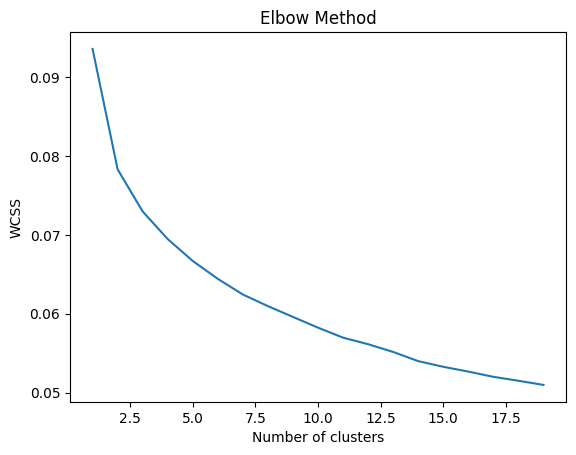

In [101]:
#find the optimal k using the elbow method
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_word_vectors)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


According to the elbow method, after k=4, the decrease in inertia begins to slow.

In [102]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(reduced_word_vectors)
labels = kmeans.labels_

**Evaluation**: use **k-means inertia** to measure the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster

In [105]:
# find out the intertia of the CURRENT kmeans model
kmeans.inertia_

0.05823763459920883

A good k-means model is one with low inertia AND a low number of clusters ( K ). Since the inertia is very close to 0(0.06), we will consider we have a good k-means clustering and the 10 labels can successfully group all processed keywords.

crete a dataframe to apply each row of the tokenized words to the map_to_word_vector function

In [106]:
tokenized_words_series = pd.Series(tokenized_words)
df_tokenized_words = pd.DataFrame(tokenized_words_series, columns=['tokenized_words'])
df_tokenized_words.head()

,tokenized_words
0,[platoon]
1,[catastrophe]
2,[k2]
3,"[special, effects]"
4,"[father, son, reunion]"


In [107]:
# map each tokenized word to its corresponding word vectors, if it is not in the word vector matrix, then use a zero vector
def map_to_word_vector(row):
    word_vector = np.zeros(200)
    for word in row:
        if word in model3.wv:
            word_vector += model3.wv[word]
    return word_vector

In [108]:
df_tokenized_words['word_vector'] = df_tokenized_words['tokenized_words'].apply(map_to_word_vector)
df_tokenized_words.head()

,tokenized_words,word_vector
0,[platoon],"[-0.0014079655520617962, -0.000845575705170631..."
1,[catastrophe],"[-6.648174894507974e-05, 6.843573646619916e-05..."
2,[k2],"[-0.001267236890271306, 0.0019260188564658165,..."
3,"[special, effects]","[-0.0002915691293310374, -0.001733459997922182..."
4,"[father, son, reunion]","[-0.003661066817585379, -0.0001775648852344602..."


In [109]:
# make sure each tokenized word find its corresponding word vector
df_tokenized_words.isna().sum()

tokenized_words    0
word_vector        0
dtype: int64

In [110]:
df_tokenized_words.shape

(16094, 2)

In [111]:
lables_series = pd.Series(labels)
lables_series.shape

(16094,)

In [112]:
df_tokenized_words['label'] = lables_series
df_tokenized_words.head()

,tokenized_words,word_vector,label
0,[platoon],"[-0.0014079655520617962, -0.000845575705170631...",0
1,[catastrophe],"[-6.648174894507974e-05, 6.843573646619916e-05...",3
2,[k2],"[-0.001267236890271306, 0.0019260188564658165,...",8
3,"[special, effects]","[-0.0002915691293310374, -0.001733459997922182...",7
4,"[father, son, reunion]","[-0.003661066817585379, -0.0001775648852344602...",0


In [113]:
# check if each cluster has appropraiet number of words
df_tokenized_words['label'].value_counts()

label
8    2693
7    2280
2    2200
5    2066
9    1947
3    1805
6    1085
0    1041
1     557
4     420
Name: count, dtype: int64

In [114]:
df_tokenized_words[df_tokenized_words['label']==0].head()

,tokenized_words,word_vector,label
0,[platoon],"[-0.0014079655520617962, -0.000845575705170631...",0
4,"[father, son, reunion]","[-0.003661066817585379, -0.0001775648852344602...",0
35,[ministry],"[-0.0011612968519330025, -0.000385022547561675...",0
40,[stallion],"[-0.00012864788004662842, 0.000347839435562491...",0
60,"[personal, relationships]","[-0.0005836004274897277, 0.0028620214434340596...",0


There are some form of similarities between the semantic relationship between words in each value, so for now we can proceed.

In [115]:
# transform dataframe by making label as a dummy variable
df_tokenized_words_getdummies = pd.get_dummies(df_tokenized_words, columns=['label'])
df_tokenized_words_getdummies.head()

,tokenized_words,word_vector,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,[platoon],"[-0.0014079655520617962, -0.000845575705170631...",True,False,False,False,False,False,False,False,False,False
1,[catastrophe],"[-6.648174894507974e-05, 6.843573646619916e-05...",False,False,False,True,False,False,False,False,False,False
2,[k2],"[-0.001267236890271306, 0.0019260188564658165,...",False,False,False,False,False,False,False,False,True,False
3,"[special, effects]","[-0.0002915691293310374, -0.001733459997922182...",False,False,False,False,False,False,False,True,False,False
4,"[father, son, reunion]","[-0.003661066817585379, -0.0001775648852344602...",True,False,False,False,False,False,False,False,False,False


In [116]:
type(df_tokenized_words_getdummies['tokenized_words'][0])

list

### Keyword Mapping & Encoded Finalization

However, there are many keywords within a single record...how do we map them to the original dataframe?

In [117]:
# find out the size of keywords in each row
df_for_model_encoded['keywords_list'] = df_for_model['keywords'].apply(lambda x: x.split(', '))
df_for_model_encoded.head()

,title,release_date,runtime,adult,original_language,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown,keywords_list
0,Inception,2010-07-15,148,False,en,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[rescue, mission, dream, airplane, paris, fran..."
1,Interstellar,2014-11-05,169,False,en,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,"[rescue, future, spacecraft, race against time..."
2,The Dark Knight,2008-07-16,152,False,en,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,"[joker, sadism, chaos, secret identity, crime ..."
3,Avatar,2009-12-15,162,False,en,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,"[future, society, culture clash, space travel,..."
4,The Avengers,2012-04-25,143,False,en,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[new york city, superhero, shield, based on co..."


In [118]:
# filter out movies that only contain words in processed_words
def filter_keywords(row):
    if isinstance(row['keywords_list'], list):
        return [word for word in row['keywords_list'] if word in processed_words]
    else:
        return []
df_for_model_encoded['keywords_list_processed'] = df_for_model_encoded.apply(filter_keywords, axis=1)
df_for_model_encoded.head()


,title,release_date,runtime,adult,original_language,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown,keywords_list,keywords_list_processed
0,Inception,2010-07-15,148,False,en,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[rescue, mission, dream, airplane, paris, fran...","[rescue, mission, dream, airplane, paris, fran..."
1,Interstellar,2014-11-05,169,False,en,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,"[rescue, future, spacecraft, race against time...","[rescue, future, spacecraft, race against time..."
2,The Dark Knight,2008-07-16,152,False,en,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,"[joker, sadism, chaos, secret identity, crime ...","[joker, sadism, chaos, secret identity, crime ..."
3,Avatar,2009-12-15,162,False,en,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,"[future, society, culture clash, space travel,...","[future, society, culture clash, space travel,..."
4,The Avengers,2012-04-25,143,False,en,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[new york city, superhero, shield, based on co...","[new york city, superhero, shield, based on co..."


In [119]:
# filter out movies that only contain words in processed_words, keep the index of the original dataframe as an extra column
df_keywords_processed = df_for_model_encoded[df_for_model_encoded['keywords_list_processed'].apply(len) > 0]
df_keywords_processed.head()

,title,release_date,runtime,adult,original_language,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown,keywords_list,keywords_list_processed
0,Inception,2010-07-15,148,False,en,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[rescue, mission, dream, airplane, paris, fran...","[rescue, mission, dream, airplane, paris, fran..."
1,Interstellar,2014-11-05,169,False,en,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,"[rescue, future, spacecraft, race against time...","[rescue, future, spacecraft, race against time..."
2,The Dark Knight,2008-07-16,152,False,en,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,"[joker, sadism, chaos, secret identity, crime ...","[joker, sadism, chaos, secret identity, crime ..."
3,Avatar,2009-12-15,162,False,en,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,"[future, society, culture clash, space travel,...","[future, society, culture clash, space travel,..."
4,The Avengers,2012-04-25,143,False,en,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[new york city, superhero, shield, based on co...","[new york city, superhero, shield, based on co..."


Given the time complexity of labeling keywords would surge as the size of movies k to be labeled increases, we need to **reuduce the number of movies to 100000**, where their language are in English(our audiences are preferably English speaker)

In [135]:
# sample 100000 rows from df_keywords_processed where languages is English
df_keywords_processed = df_keywords_processed[df_keywords_processed['language_English'] == 1]
df_keywords_processe_sample = df_keywords_processed.head(100000)
df_keywords_processe_sample.head()

,title,release_date,runtime,adult,original_language,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown,keywords_list,keywords_list_processed
0,Inception,2010-07-15,148,False,en,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[rescue, mission, dream, airplane, paris, fran...","[rescue, mission, dream, airplane, paris, fran..."
1,Interstellar,2014-11-05,169,False,en,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,"[rescue, future, spacecraft, race against time...","[rescue, future, spacecraft, race against time..."
2,The Dark Knight,2008-07-16,152,False,en,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,"[joker, sadism, chaos, secret identity, crime ...","[joker, sadism, chaos, secret identity, crime ..."
3,Avatar,2009-12-15,162,False,en,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,"[future, society, culture clash, space travel,...","[future, society, culture clash, space travel,..."
4,The Avengers,2012-04-25,143,False,en,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[new york city, superhero, shield, based on co...","[new york city, superhero, shield, based on co..."


Given labeling each movie with corresponding clusters, there are two methods:

    # method 1: if the corresponding word in the df_tokenized_words_getdummies dataframe is found, find which label is labeled 1, and assign the same label as true in the sample dataframe, if the label is already true, then do  not change anything


In [ ]:
# def find_row(df, word):
#     for index, row in df.iterrows():
#         if word.split() == row.tolist()[0]:
#             return index

# for idx, row in df_sample_keyword_mapping.iterrows():
#     flags = [0, 0, 0, 0]
#     for word in list(row['keywords'].split(', ')):
#         x = find_row(df_tokenized_words_getdummies, word)
#         if x is not None:
#             a = ((df_tokenized_words_getdummies.iloc[x])[2])
#             b = ((df_tokenized_words_getdummies.iloc[x])[3])
#             c = ((df_tokenized_words_getdummies.iloc[x])[4])
#             d = ((df_tokenized_words_getdummies.iloc[x])[5])
#             if a == 1:
#                 flags[0] = 1
#             if b == 1:
#                 flags[1] = 1
#             if c == 1:
#                 flags[2] = 1
#             if d == 1:
#                 flags[3] = 1
#     df_sample_keyword_mapping.at[idx, 'label_0.0'] = flags[0]
#     df_sample_keyword_mapping.at[idx, 'label_1.0'] = flags[1]
#     df_sample_keyword_mapping.at[idx, 'label_2.0'] = flags[2]
#     df_sample_keyword_mapping.at[idx, 'label_3.0'] = flags[3]

# df_sample_keyword_mapping


After trying out the first method, all columns are marked with 1, so this method is forgone.

    # method 2: for every word found in the string of 'keywords', if this word is found in one of the label, increment 1 under the corresponding label, so that for every row in df_sample_keyword_mapping, value under each label will show how many words in this row belong to each label


In [136]:
# rate the label of each row in df_keywords_processe_sample by the number of keywords it contains
def find_row(df, word):
    for index, row in df.iterrows():
        if word.split() == row.tolist()[0]:
            return index

# Initialize a dictionary to store the count of each label for each row
label_counts = []

for row in df_keywords_processed['keywords_list_processed']:
    label_count = {f'label_{i}': 0 for i in range(k)}
    for word in row:
        x = find_row(df_tokenized_words_getdummies, word)
        if x is not None:
            for i in range(k):
                label_count[f'label_{i}'] += df_tokenized_words_getdummies.iloc[x][f'label_{i}']
    label_counts.append(label_count)

# Convert the list of dictionaries to a DataFrame
df_label_counts = pd.DataFrame(label_counts)
df_sample_keyword_mapping = pd.concat([df_keywords_processed, df_label_counts], axis=1)
df_sample_keyword_mapping.head()


,title,release_date,runtime,adult,original_language,keywords,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown,keywords_list,keywords_list_processed,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,2010-07-15,148.0,False,en,"rescue, mission, dream, airplane, paris, franc...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[rescue, mission, dream, airplane, paris, fran...","[rescue, mission, dream, airplane, paris, fran...",0.0,0.0,4.0,3.0,2.0,5.0,1.0,2.0,1.0,2.0
1,Interstellar,2014-11-05,169.0,False,en,"rescue, future, spacecraft, race against time,...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[rescue, future, spacecraft, race against time...","[rescue, future, spacecraft, race against time...",5.0,0.0,2.0,4.0,4.0,0.0,2.0,2.0,6.0,6.0
2,The Dark Knight,2008-07-16,152.0,False,en,"joker, sadism, chaos, secret identity, crime f...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[joker, sadism, chaos, secret identity, crime ...","[joker, sadism, chaos, secret identity, crime ...",0.0,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,4.0
3,Avatar,2009-12-15,162.0,False,en,"future, society, culture clash, space travel, ...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[future, society, culture clash, space travel,...","[future, society, culture clash, space travel,...",4.0,0.0,1.0,6.0,0.0,1.0,3.0,2.0,0.0,3.0
4,The Avengers,2012-04-25,143.0,False,en,"new york city, superhero, shield, based on com...",False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[new york city, superhero, shield, based on co...","[new york city, superhero, shield, based on co...",1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0


In [138]:
# drop columns that are not needed for the similarity comparison
df_for_model_encoded_final=df_sample_keyword_mapping.drop(['keywords','keywords_list', 'keywords_list_processed', 'release_date', 'runtime', 'original_language'], axis=1)
df_for_model_encoded_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,5.0,1.0,2.0,1.0,2.0
1,Interstellar,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,4.0,4.0,0.0,2.0,2.0,6.0,6.0
2,The Dark Knight,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,4.0
3,Avatar,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,6.0,0.0,1.0,3.0,2.0,0.0,3.0
4,The Avengers,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0


Finally, there are over **120k movies** processed and proceed to be compared for recommendation

In [139]:
# set title as index
df_for_model_encoded_final.set_index('title', inplace=True)
df_for_model_encoded_final.head()

,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,runtime_type_Short Film,language_English,language_French,language_German,language_Japanese,language_Other,language_Russian,language_Spanish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,unknown,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Inception,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,5.0,1.0,2.0,1.0,2.0
Interstellar,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,4.0,4.0,0.0,2.0,2.0,6.0,6.0
The Dark Knight,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,4.0
Avatar,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,6.0,0.0,1.0,3.0,2.0,0.0,3.0
The Avengers,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0


In [140]:
df_for_model_encoded_final.to_csv('df_model_encoded.csv')

In [70]:
# import encoded dataframe that has been built in the first notebook
df_for_model_encoded_final = pd.read_csv('df_model_encoded.csv')
df_for_model_encoded_final.head()

/var/folders/zn/n1m53dd91kn4vb6h0sjwxhh40000gn/T/ipykernel_21508/2084950693.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_for_model_encoded_final = pd.read_csv('df_model_encoded.csv')


,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,False,False,True,False,False,False,False,True,False,...,0.0,0.0,4.0,3.0,2.0,5.0,1.0,2.0,1.0,2.0
1,Interstellar,False,False,True,False,False,False,False,True,False,...,5.0,0.0,2.0,4.0,4.0,0.0,2.0,2.0,6.0,6.0
2,The Dark Knight,False,False,True,False,False,False,False,True,False,...,0.0,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,4.0
3,Avatar,False,False,True,False,False,False,False,True,False,...,4.0,0.0,1.0,6.0,0.0,1.0,3.0,2.0,0.0,3.0
4,The Avengers,False,False,True,False,False,False,False,True,False,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0


In [71]:
# drop any null values
df_for_model_encoded_final.dropna(inplace=True)
df_for_model_encoded_final.shape

(129860, 49)

In [72]:
# drop any duplicates
df_for_model_encoded_final.drop_duplicates(inplace=True)
df_for_model_encoded_final.shape

(129671, 49)

In [73]:
# since we only slice out the English movies for training,we can drop the original_language column
df_for_model_encoded_final.drop(['language_English', 'language_French', 'language_German', 'language_Japanese', 'language_Other', 'language_Russian', 'language_Spanish'], axis=1, inplace=True)
df_for_model_encoded_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,False,False,True,False,False,False,False,True,False,...,0.0,0.0,4.0,3.0,2.0,5.0,1.0,2.0,1.0,2.0
1,Interstellar,False,False,True,False,False,False,False,True,False,...,5.0,0.0,2.0,4.0,4.0,0.0,2.0,2.0,6.0,6.0
2,The Dark Knight,False,False,True,False,False,False,False,True,False,...,0.0,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,4.0
3,Avatar,False,False,True,False,False,False,False,True,False,...,4.0,0.0,1.0,6.0,0.0,1.0,3.0,2.0,0.0,3.0
4,The Avengers,False,False,True,False,False,False,False,True,False,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0


### Assign weighting

Before we proceed, we need to assign weights to different columns so that:
1. rating in different **genres and labels** would sum up to 1 <br>
(ex.if movie 1 has 2 in label 1, 3 in label 2, and 5 in label 3, <br>
then each value will be converted to 2/(2+3+5)=0.2 in label 1, 3/(2+3+5)=0.3 in label 2, and 5/(2+3+5)=0.5 in label 3)
2. greater weights in adult, era, runtime, genres than weighted keywords

In [74]:
# relabel genre columns so that rating in different genres would sum up to 1 
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'unknown']
df_for_model_encoded_final[genre_columns] = df_for_model_encoded_final[genre_columns].div(df_for_model_encoded_final[genre_columns].sum(axis=1), axis=0)
df_for_model_encoded_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,False,False,True,False,False,False,False,True,False,...,0.0,0.0,4.0,3.0,2.0,5.0,1.0,2.0,1.0,2.0
1,Interstellar,False,False,True,False,False,False,False,True,False,...,5.0,0.0,2.0,4.0,4.0,0.0,2.0,2.0,6.0,6.0
2,The Dark Knight,False,False,True,False,False,False,False,True,False,...,0.0,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,4.0
3,Avatar,False,False,True,False,False,False,False,True,False,...,4.0,0.0,1.0,6.0,0.0,1.0,3.0,2.0,0.0,3.0
4,The Avengers,False,False,True,False,False,False,False,True,False,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0


In [75]:
# relabel label 0 to label 9 so that rating in different labels would sum up to 1 
# (ex.if movie 1 has 2 in label 1, 3 in label 2, and 5 in label 3, then each value will be converted to 2/(2+3+5)=0.2 in label 1, 3/(2+3+5)=0.3 in label 2, and 5/(2+3+5)=0.5 in label 3)
label_columns = [f'label_{i}' for i in range(10)]
df_for_model_encoded_final[label_columns] = df_for_model_encoded_final[label_columns].div(df_for_model_encoded_final[label_columns].sum(axis=1), axis=0)
df_for_model_encoded_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,False,False,True,False,False,False,False,True,False,...,0.00000,0.0,0.200000,0.150000,0.100000,0.250000,0.050000,0.100000,0.050000,0.100000
1,Interstellar,False,False,True,False,False,False,False,True,False,...,0.16129,0.0,0.064516,0.129032,0.129032,0.000000,0.064516,0.064516,0.193548,0.193548
2,The Dark Knight,False,False,True,False,False,False,False,True,False,...,0.00000,0.0,0.117647,0.176471,0.000000,0.117647,0.117647,0.117647,0.117647,0.235294
3,Avatar,False,False,True,False,False,False,False,True,False,...,0.20000,0.0,0.050000,0.300000,0.000000,0.050000,0.150000,0.100000,0.000000,0.150000
4,The Avengers,False,False,True,False,False,False,False,True,False,...,0.12500,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000


Determining the appropriate weights for different features in a movie dataset involves careful consideration of how much each feature contributes to the overall similarity measure. <br><br>
Here are the proposed weighting:
1. **adult: 4** -- This feature could be highly influential in determining audience preference. For many viewers, adult content is a significant distinguishing factor.
2. **genres: 4** -- Genres are often the primary factor in movie selection for viewers. They define the storytelling style, themes, and overall expectations of the film, making this a crucial component in determining film similarity and preferences.
3. **runtime: 2** -- Runtime can influence a viewer’s choice (e.g., a preference for short films for casual viewing versus feature films for dedicated watching). However, it could be secondary to the content and thematic similarity as a feature in most analyses
4. **era: 2** --  Era can help contextualize a film's style, themes, and production values. Movies from the same era might share stylistic features, making this a relevant feature. However, like runtime type, it shouldn’t be as heavily weighted as genres.
5. **keywords: 1** -- Keywords can capture detailed thematic elements and narrative aspects that go beyond simple classifications. They, however, are highly subjective in evaluating movies' similarity, especially when genres are present, as a result, it is secondary in weighting.


In [76]:
# adult times 4, era times 2, runtime times 2, genres times 1, keywords times 5
df_for_model_encoded_final['adult'] = df_for_model_encoded_final['adult']*4
df_for_model_encoded_final.head()


,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,0,False,True,False,False,False,False,True,False,...,0.00000,0.0,0.200000,0.150000,0.100000,0.250000,0.050000,0.100000,0.050000,0.100000
1,Interstellar,0,False,True,False,False,False,False,True,False,...,0.16129,0.0,0.064516,0.129032,0.129032,0.000000,0.064516,0.064516,0.193548,0.193548
2,The Dark Knight,0,False,True,False,False,False,False,True,False,...,0.00000,0.0,0.117647,0.176471,0.000000,0.117647,0.117647,0.117647,0.117647,0.235294
3,Avatar,0,False,True,False,False,False,False,True,False,...,0.20000,0.0,0.050000,0.300000,0.000000,0.050000,0.150000,0.100000,0.000000,0.150000
4,The Avengers,0,False,True,False,False,False,False,True,False,...,0.12500,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000


In [77]:
era_columns = ['era_Digital Era', 'era_Blockbuster Era', 'era_Golden Age', 'era_Post-War Era', 'era_The Silent Era']
df_for_model_encoded_final[era_columns] = df_for_model_encoded_final[era_columns]*2
df_for_model_encoded_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,0,0,2,0,0,0,False,True,False,...,0.00000,0.0,0.200000,0.150000,0.100000,0.250000,0.050000,0.100000,0.050000,0.100000
1,Interstellar,0,0,2,0,0,0,False,True,False,...,0.16129,0.0,0.064516,0.129032,0.129032,0.000000,0.064516,0.064516,0.193548,0.193548
2,The Dark Knight,0,0,2,0,0,0,False,True,False,...,0.00000,0.0,0.117647,0.176471,0.000000,0.117647,0.117647,0.117647,0.117647,0.235294
3,Avatar,0,0,2,0,0,0,False,True,False,...,0.20000,0.0,0.050000,0.300000,0.000000,0.050000,0.150000,0.100000,0.000000,0.150000
4,The Avengers,0,0,2,0,0,0,False,True,False,...,0.12500,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000


In [78]:
runtime_columns = ['runtime_type_Epic Length Film', 'runtime_type_Extended Feature Film', 'runtime_type_Feature Film', 'runtime_type_Featurette', 'runtime_type_Short Film']
df_for_model_encoded_final[runtime_columns] = df_for_model_encoded_final[runtime_columns]*2
df_for_model_encoded_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,0,0,2,0,0,0,0,2,0,...,0.00000,0.0,0.200000,0.150000,0.100000,0.250000,0.050000,0.100000,0.050000,0.100000
1,Interstellar,0,0,2,0,0,0,0,2,0,...,0.16129,0.0,0.064516,0.129032,0.129032,0.000000,0.064516,0.064516,0.193548,0.193548
2,The Dark Knight,0,0,2,0,0,0,0,2,0,...,0.00000,0.0,0.117647,0.176471,0.000000,0.117647,0.117647,0.117647,0.117647,0.235294
3,Avatar,0,0,2,0,0,0,0,2,0,...,0.20000,0.0,0.050000,0.300000,0.000000,0.050000,0.150000,0.100000,0.000000,0.150000
4,The Avengers,0,0,2,0,0,0,0,2,0,...,0.12500,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000


In [79]:
df_for_model_encoded_final[genre_columns] = df_for_model_encoded_final[genre_columns]*4
df_for_model_encoded_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,0,0,2,0,0,0,0,2,0,...,0.00000,0.0,0.200000,0.150000,0.100000,0.250000,0.050000,0.100000,0.050000,0.100000
1,Interstellar,0,0,2,0,0,0,0,2,0,...,0.16129,0.0,0.064516,0.129032,0.129032,0.000000,0.064516,0.064516,0.193548,0.193548
2,The Dark Knight,0,0,2,0,0,0,0,2,0,...,0.00000,0.0,0.117647,0.176471,0.000000,0.117647,0.117647,0.117647,0.117647,0.235294
3,Avatar,0,0,2,0,0,0,0,2,0,...,0.20000,0.0,0.050000,0.300000,0.000000,0.050000,0.150000,0.100000,0.000000,0.150000
4,The Avengers,0,0,2,0,0,0,0,2,0,...,0.12500,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000


### Normalization

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
df_for_model_encoded_norm = scaler.fit_transform(df_for_model_encoded_final.drop('title',axis=1))
df_norm_df = pd.DataFrame(df_for_model_encoded_norm, columns=[x for x in df_for_model_encoded_final.columns if x not in 'title'])
df_norm_df.head()

,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,runtime_type_Featurette,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,-0.257051,...,-0.232422,-0.150139,0.717873,0.445733,0.988105,1.403437,0.162834,0.252171,-1.305495,0.339419
1,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,-0.257051,...,1.339791,-0.150139,-0.001507,0.336725,1.325482,-0.302828,0.285331,0.052840,-0.989023,0.946005
2,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,-0.257051,...,-0.232422,-0.150139,0.280602,0.583350,-0.173970,0.500121,0.733684,0.351304,-1.156358,1.216692
3,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,-0.257051,...,1.717122,-0.150139,-0.078584,1.225561,-0.173970,0.038425,1.006699,0.252171,-1.415727,0.663629
4,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,-0.257051,...,0.986043,-0.150139,-0.344069,0.965619,-0.173970,-0.302828,-0.259098,-0.309581,-1.415727,3.743619


In [81]:
df_final = pd.concat([df_for_model_encoded_final['title'], df_norm_df], axis=1)
df_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,-0.232422,-0.150139,0.717873,0.445733,0.988105,1.403437,0.162834,0.252171,-1.305495,0.339419
1,Interstellar,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,1.339791,-0.150139,-0.001507,0.336725,1.325482,-0.302828,0.285331,0.052840,-0.989023,0.946005
2,The Dark Knight,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,-0.232422,-0.150139,0.280602,0.583350,-0.173970,0.500121,0.733684,0.351304,-1.156358,1.216692
3,Avatar,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,1.717122,-0.150139,-0.078584,1.225561,-0.173970,0.038425,1.006699,0.252171,-1.415727,0.663629
4,The Avengers,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,0.986043,-0.150139,-0.344069,0.965619,-0.173970,-0.302828,-0.259098,-0.309581,-1.415727,3.743619


In [82]:
df_final.head()

,title,adult,era_Blockbuster Era,era_Digital Era,era_Golden Age,era_Post-War Era,era_The Silent Era,runtime_type_Epic Length Film,runtime_type_Extended Feature Film,runtime_type_Feature Film,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,Inception,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,-0.232422,-0.150139,0.717873,0.445733,0.988105,1.403437,0.162834,0.252171,-1.305495,0.339419
1,Interstellar,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,1.339791,-0.150139,-0.001507,0.336725,1.325482,-0.302828,0.285331,0.052840,-0.989023,0.946005
2,The Dark Knight,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,-0.232422,-0.150139,0.280602,0.583350,-0.173970,0.500121,0.733684,0.351304,-1.156358,1.216692
3,Avatar,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,1.717122,-0.150139,-0.078584,1.225561,-0.173970,0.038425,1.006699,0.252171,-1.415727,0.663629
4,The Avengers,-0.280798,-0.256317,0.615209,-0.352685,-0.292363,-0.15528,-0.152338,3.411524,-1.287637,...,0.986043,-0.150139,-0.344069,0.965619,-0.173970,-0.302828,-0.259098,-0.309581,-1.415727,3.743619


In [83]:
# set movie title as index
df_final.set_index('title', inplace=True)

In [99]:
# output the final dataframe to a csv file for a later use
df_final.to_csv('movie_rec_databse.csv')

## Model Deployment

### Cosine Similarity

In content-based filtering, the most common similarity comparison methods used to determine how similar two items are based on their features are cosine similarity, Euclidean distance, Jaccard similarity. <br><br>
Here we will choose **cosine similarity** because of its ability to handle sparse data and high-dimensional feature spaces effectively. 

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# return the top 10 most similar movies from the original dataframe, given their cosine similarity
def get_recommendation():

    movie_name = input("Enter the movie name you are looking for: ").strip().lower().replace(' ', '')
    
    # make sure n is a valid integer between 1 and 20
    while True:
        n_input = input("How many movies are you looking for to recommend? (default is 10): ").strip()
        if n_input == "":
            n = 10
            break
        try:
            n = int(n_input)
            if n < 1 or n > 20:
                print("Please choose a number between 1 and 20.")
            else:
                break
        except ValueError:
            print("Please enter a valid integer.")

    # load the encoded dataframe for cosine similarity calculation
    df_final = pd.read_csv('movie_rec_databse.csv')
    df_final.set_index('title', inplace=True)
    # Standardize movie names in the final dataframe
    df_final.index = df_final.index.str.strip().str.lower().str.replace(' ', '')
    
    # load the original dataset
    df = pd.read_csv('TMDB_movie_dataset_v11.csv')
    # drop duplicate values
    df.drop_duplicates(inplace=True)
    # drop null values
    df.dropna(inplace=True)
    # standardize movie names in the original dataset
    df['title'] = df['title'].str.strip().str.lower().str.replace(' ', '')
    
    if movie_name not in df_final.index:
        print(f"No match is available yet. Here are the top {n} trending movies for inspiration:")
        trending_movies = df_final.head(n)
        return trending_movies

    new_df = df_final.loc[[movie_name]]
    # Remove rows with NaN values
    df_other = df_final.loc[df_final.index != movie_name, :].dropna()
    # Get the titles of the other movies
    df_titles = df_other.index
    cosine_sim_matrix = cosine_similarity(new_df, df_other)
    cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=[movie_name], columns=df_titles)
    # Get the top n most similar movies
    top_n_similar = cosine_sim_df.T.sort_values(by=movie_name, ascending=False).head(n)
    # Slice out movie‘s information from the original dataset by title
    top_n_similar_df = df.loc[df['title'].isin(top_n_similar.index)]
    return top_n_similar_df

# Example usage:
get_recommendation()



,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
128,330459,rogueone:astarwarsstory,7.488,14354,Released,2016-12-14,1056057273,133,False,/6t8ES1d12OzWyCGxBeDYLHoaDrT.jpg,...,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,33.100,/i0yw1mFbB7sNGHCs7EXZPzFkdA1.jpg,A Rebellion Built on Hope,"Action, Adventure, Science Fiction",Lucasfilm Ltd.,United States of America,English,"rebellion, spacecraft, rebel, space battle, sp..."
407,348350,solo:astarwarsstory,6.563,7904,Released,2018-05-15,392952373,135,False,/ojHCeDULAkQK25700fhRU75Tur2.jpg,...,Solo: A Star Wars Story,Through a series of daring escapades deep with...,55.759,/3IGbjc5ZC5yxim5W0sFING2kdcz.jpg,Never tell him the odds.,"Science Fiction, Adventure, Action","Lucasfilm Ltd., Allison Shearmur Productions, ...",United States of America,English,"spacecraft, smuggling (contraband), prequel, s..."
684,335988,transformers:thelastknight,6.059,5727,Released,2017-06-16,605425157,154,False,/1n00NlOGRFZVs8coBxyZLm5l4EC.jpg,...,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",44.968,/s5HQf2Gb3lIO2cRcFwNL9sn1o1o.jpg,Two worlds collide. One survives.,"Action, Adventure, Science Fiction","Paramount, di Bonaventura Pictures, Ian Bryce ...",United States of America,English,"england, based on toy, knight, robot, transfor..."
834,624860,thematrixresurrections,6.479,5018,Released,2021-12-16,156497322,147,False,/eNI7PtK6DEYgZmHWP9gQNuff8pv.jpg,...,The Matrix Resurrections,"Plagued by strange memories, Neo's life takes ...",52.143,/8c4a8kE7PizaGQQnditMmI1xbRp.jpg,Return to the Source.,"Science Fiction, Action, Adventure","Warner Bros. Pictures, Village Roadshow Pictur...","Canada, Germany, United States of America",English,"future, man vs machine, underground world, art..."
1596,588228,thetomorrowwar,7.572,2806,Released,2021-09-03,14400000,138,False,/yizL4cEKsVvl17Wc1mGEIrQtM2F.jpg,...,The Tomorrow War,The world is stunned when a group of time trav...,103.895,/34nDCQZwaEvsy4CFO5hkGRFDCVU.jpg,The fight for tomorrow begins today.,"Action, Science Fiction, Adventure","Skydance, Phantom Four, Lit Entertainment Group",United States of America,English,"world cup, time travel, global warming, glacie..."


## Conclusion